# Importing Libraries

In [55]:
# Basic Libraries
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

# model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold, cross_val_predict

# preprocessing
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.base import clone

# pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# model development
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# performance metrics
from sklearn.metrics import classification_report, make_scorer, f1_score, precision_score, recall_score, accuracy_score, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve

# deployment
import pickle

# warnings
import warnings
warnings.filterwarnings('ignore')

In [56]:
# setting background style for plots
sns.set_style('darkgrid')

# Getting the Data

In [57]:
donation= pd.read_csv('blood_don.csv')
donation.head()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0


In [58]:
donation.shape

(576, 6)

<font color=darkviolet>There are 576 rows and 6 columns in the dataset

In [59]:
donation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Unnamed: 0                   576 non-null    int64
 1   Months since Last Donation   576 non-null    int64
 2   Number of Donations          576 non-null    int64
 3   Total Volume Donated (c.c.)  576 non-null    int64
 4   Months since First Donation  576 non-null    int64
 5   Made Donation in March 2007  576 non-null    int64
dtypes: int64(6)
memory usage: 27.1 KB


In [60]:
donation.describe()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,374.034722,9.439236,5.427083,1356.770833,34.050347,0.239583
std,216.947773,8.175454,5.740010,1435.002556,24.227672,0.427200
min,0.000000,0.000000,1.000000,250.000000,2.000000,0.000000
25%,183.750000,2.000000,2.000000,500.000000,16.000000,0.000000
50%,375.500000,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,562.500000,14.000000,7.000000,1750.000000,49.250000,0.000000
max,747.000000,74.000000,50.000000,12500.000000,98.000000,1.000000


In [61]:
donation.columns

Index(['Unnamed: 0', 'Months since Last Donation', 'Number of Donations',
       'Total Volume Donated (c.c.)', 'Months since First Donation',
       'Made Donation in March 2007'],
      dtype='object')

In [62]:
#dropping the column
donation.drop('Unnamed: 0', axis=1, inplace=True)

In [63]:
def transform_name(x):
   
    x= x.lower()
    x=x.replace(' ', '_')
    return x

In [64]:
# list of columns
column_names= list(donation.columns)

# transforming column names
column_names= map(lambda x: transform_name(x), column_names)
donation.columns=column_names

In [65]:
# cross checking column names
donation.head(3)

,months_since_last_donation,number_of_donations,total_volume_donated_(c.c.),months_since_first_donation,made_donation_in_march_2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1


In [66]:
# checking whether the target column is balanced
donation.made_donation_in_march_2007.value_counts()

made_donation_in_march_2007
0    438
1    138
Name: count, dtype: int64

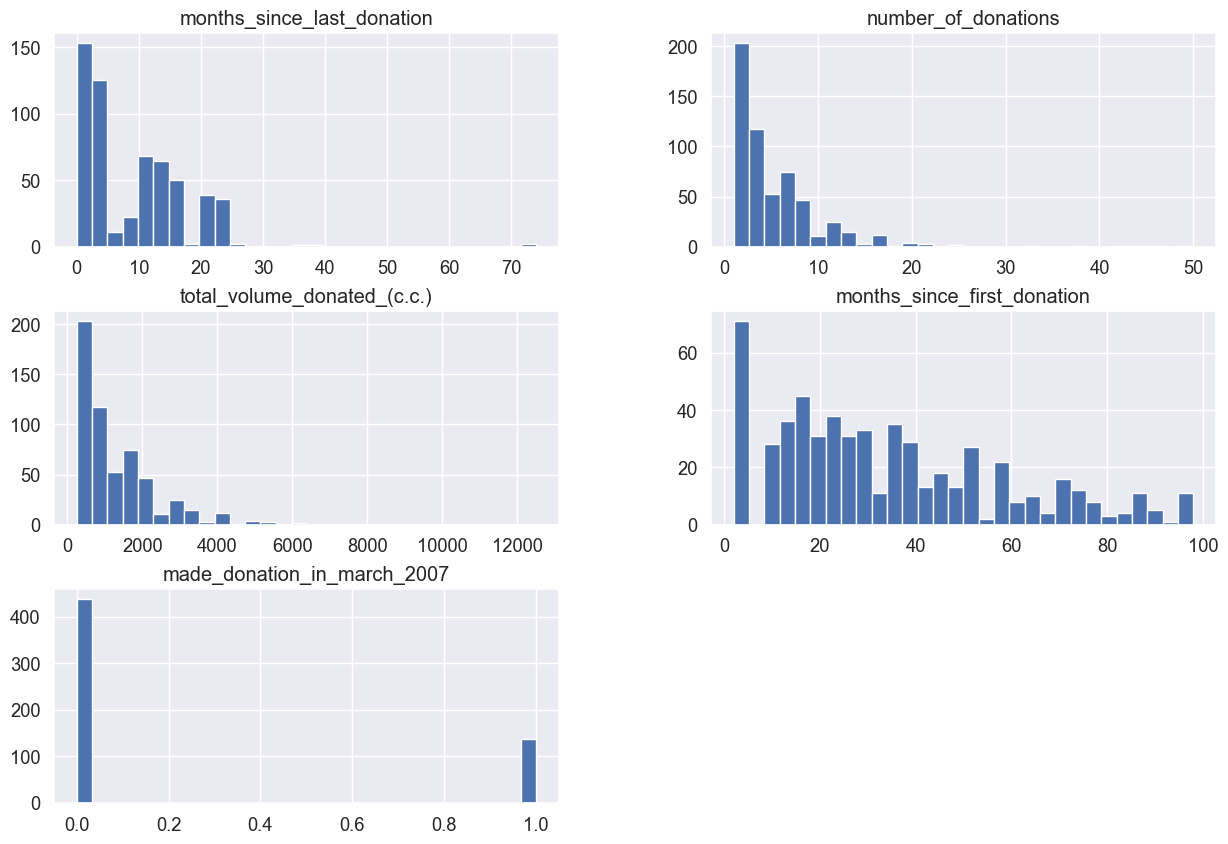

In [67]:
# UNIVARIATE ANALYSIS
donation.hist(bins=30, figsize=(15,10));

In [68]:
# splitting train and test set
donor_train, donor_test= train_test_split(donation, test_size=0.2, random_state=0)

In [69]:
print('donation', donation.shape)
print('donor_train', donor_train.shape)
print('donor_test', donor_test.shape)

donation (576, 5)
donor_train (460, 5)
donor_test (116, 5)


In [70]:
# creating a copy of both sets
train= donor_train.copy()
test=donor_test.copy()

## Multivariate Analysis

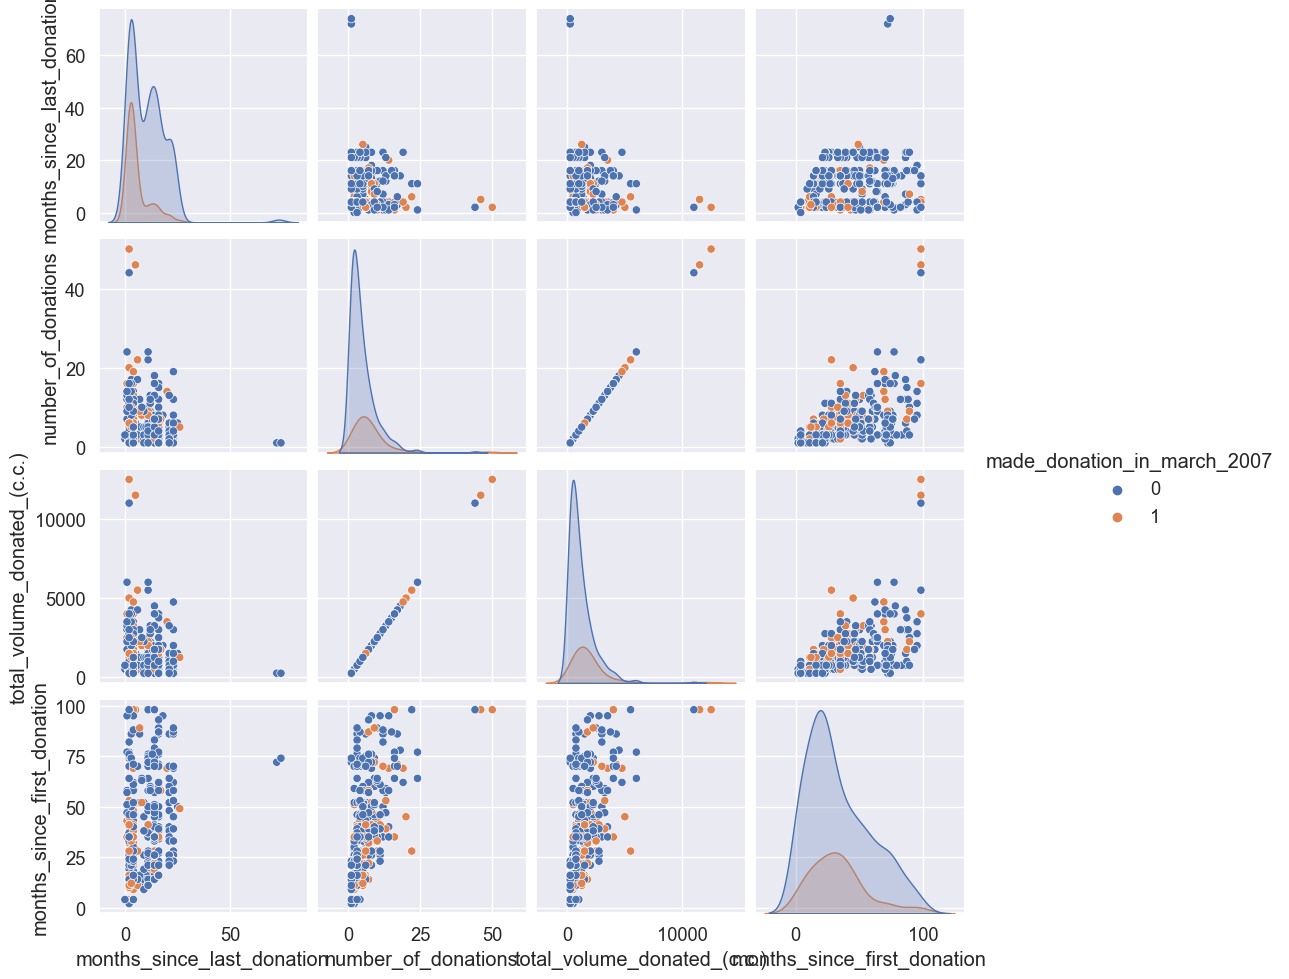

In [71]:
sns.pairplot(train, hue='made_donation_in_march_2007')

<Axes: >

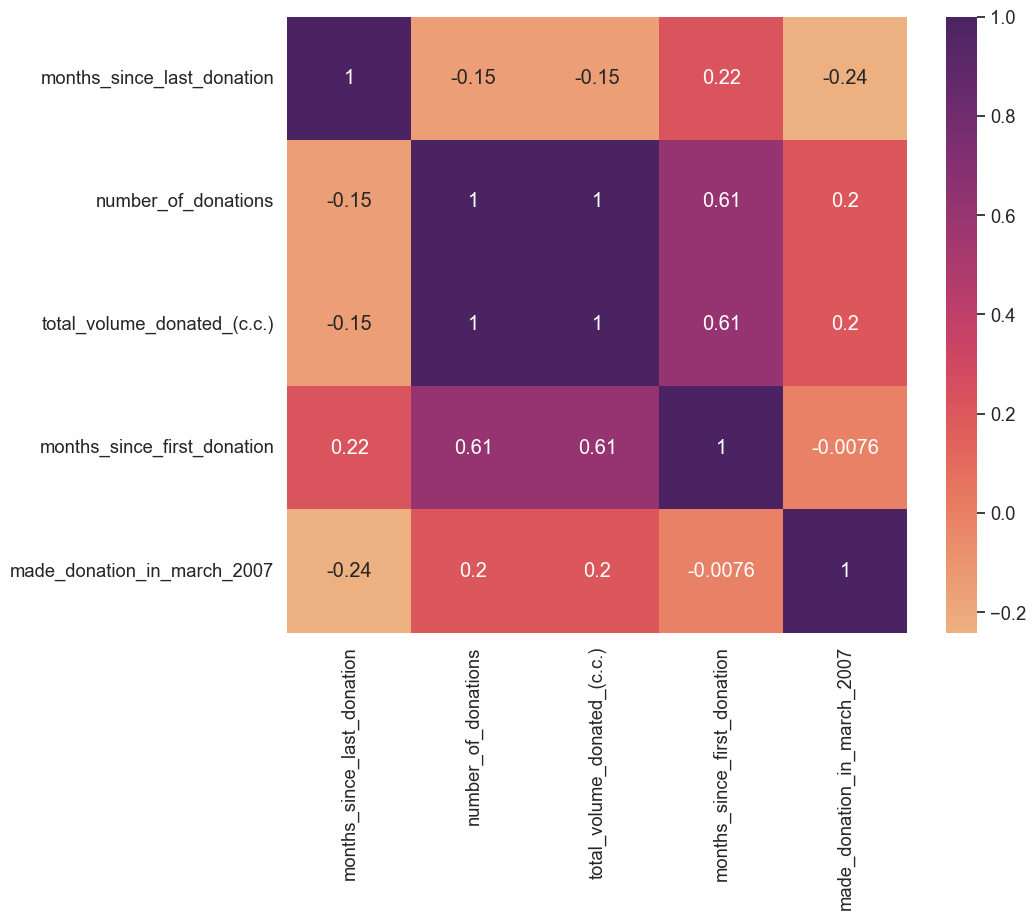

In [72]:
plt.figure(figsize=(10,8))
sns.heatmap(train.corr(), annot=True, cmap='flare')

In [73]:
train.corr()['made_donation_in_march_2007']

months_since_last_donation    -0.240823
number_of_donations            0.202696
total_volume_donated_(c.c.)    0.202696
months_since_first_donation   -0.007590
made_donation_in_march_2007    1.000000
Name: made_donation_in_march_2007, dtype: float64

## Missing values

In [74]:
train.isna().sum()

months_since_last_donation     0
number_of_donations            0
total_volume_donated_(c.c.)    0
months_since_first_donation    0
made_donation_in_march_2007    0
dtype: int64

<font color=darkviolet>There are no missing values in the dataset

## Duplicated values

In [75]:
train[train.duplicated()]

,months_since_last_donation,number_of_donations,total_volume_donated_(c.c.),months_since_first_donation,made_donation_in_march_2007
356,21,1,250,21,0
347,21,1,250,21,0
357,21,1,250,21,0
140,2,1,250,2,0
172,4,1,250,4,0
...,...,...,...,...,...
174,4,1,250,4,0
314,16,1,250,16,0
472,4,1,250,4,0
70,2,6,1500,28,1


<font color=darkviolet>There are 114 duplicated values in the dataset

In [76]:
# train set
train.drop_duplicates(inplace=True)
# test set
test.drop_duplicates(inplace=True)

In [77]:
train.duplicated().sum()

0

# Checking Outliers

In [78]:
def find_outliers(col_name):
  
    
    Q1 = train[col_name].quantile(0.25)
    Q3 = train[col_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    outliers = train[(train[col_name] < lower_bound) | (train[col_name] > upper_bound)].index.tolist()
    
    return outliers


In [79]:
print('Percentage of Outliers in features:')
print('===========================================')
print('months_since_last_donation', np.round(len(find_outliers('months_since_last_donation'))/train.shape[0]*100,2),'%')
print('number_of_donations', np.round(len(find_outliers('number_of_donations'))/train.shape[0]*100,2),'%')
print('total_volume_donated_(c.c.)', np.round(len(find_outliers('total_volume_donated_(c.c.)'))/train.shape[0]*100,2),'%')
print('months_since_first_donation', np.round(len(find_outliers('months_since_first_donation'))/train.shape[0]*100, 2),'%')

Percentage of Outliers in features:
months_since_last_donation 0.59 %
number_of_donations 6.21 %
total_volume_donated_(c.c.) 6.21 %
months_since_first_donation 0.0 %


In [80]:
find_outliers('number_of_donations')==find_outliers('total_volume_donated_(c.c.)')

True

In [81]:
train.loc[find_outliers('number_of_donations')]['number_of_donations'].values

array([19, 22, 17, 46, 24, 24, 18, 16, 16, 16, 16, 17, 20, 16, 50, 22, 19,
       17, 44, 16, 16], dtype=int64)

## Feature Engineering

In [82]:
train_new=train.copy()

In [83]:
train_new['donation_period']=train_new['months_since_first_donation']-train_new['months_since_last_donation']

In [84]:
train_new.corr()['made_donation_in_march_2007']

months_since_last_donation    -0.251214
number_of_donations            0.120406
total_volume_donated_(c.c.)    0.120406
months_since_first_donation   -0.137525
made_donation_in_march_2007    1.000000
donation_period               -0.047653
Name: made_donation_in_march_2007, dtype: float64

<Axes: >

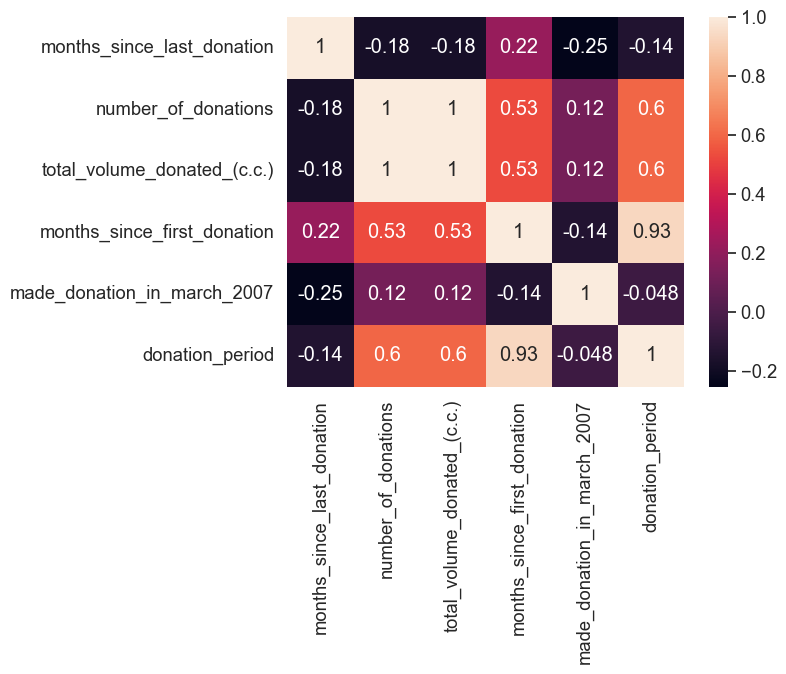

In [85]:
sns.heatmap(train_new.corr(), annot=True)

<font color=darkviolet>The new feature 'donation_period' has very weak correlation with target variable. Hence will focus on existing features to train the model.

In the next sections, we will apply transformation and scaling techniques. These techniques will be applied on the independent features only. Hence before moving with next section, let us first split the dependent and independent featues from the dataset

## Splitting Independent and Dependent Features

In [86]:
# train_set
X_train= train.drop('made_donation_in_march_2007', axis=1)
y_train=train['made_donation_in_march_2007']

# test_set
X_test= test.drop('made_donation_in_march_2007', axis=1)
y_test=test['made_donation_in_march_2007']

In [87]:
class DropAttribute(BaseEstimator, TransformerMixin):
    """
    A transformer that drops the specified attribute(s) from the input DataFrame.

    Parameters:
        attribute_names (list): A list of attribute names to drop from the input DataFrame.
    """
    
    def __init__(self, attribute_names=None):
        self.attribute_names = attribute_names
        
    def fit(self, X, y=None):
        """
        Fits the transformer to the input data.

        Parameters
        ----------
        X : pandas DataFrame
            The input data.

        Returns
        -------
        self : DropAttribute
            The fitted transformer.
        """

        # Set the attribute_names attribute to the value passed in the constructor
        self.attribute_names = self.attribute_names

        # Return self
        return self
    
    def transform(self, X, y=None):
        """
        Transforms the input data by dropping specified columns.

        Parameters
        ----------
        X : pandas DataFrame
            The input data.

        Returns
        -------
        pandas DataFrame
            The input data with specified columns dropped.
        """

        if self.attribute_names is None:
            return X
        
        else:
            new_df = X.drop(columns=self.attribute_names, errors='ignore')
            
            return new_df


In [88]:
class SkewnessTransformer(BaseEstimator, TransformerMixin):
    """
    Applied selected transformation technique to skewed columns and return the transformed dataset with distribution closer to normal

    Parameters:
        method (str): The name of the transformation method to use. Must be one of 'boxcox', 'log', 'sqrt', 'inv', 'power', or 'quantile'.
        columns (str or list): The name of the column(s) to transform. If multiple columns, pass them as a list.
    """

    def __init__(self, method=None, columns=None):
        self.method = method
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        """
        Applies the specified transformation method to the specified columns of the given DataFrame.

        Parameters:
            X (Pandas DataFrame): The DataFrame to transform.

        Returns:
            Pandas DataFrame: The transformed DataFrame.
        """
        # Making a copy of the DataFrame to avoid modifying the original data
        transformed_df = X.copy()

        # Checking if the method argument is valid
        valid_methods = [None, 'boxcox', 'log', 'sqrt', 'inv', 'power', 'quantile']
        if self.method not in valid_methods:
            raise ValueError(f"Invalid method argument. Must be one of {valid_methods}.")

        # Checking if the columns argument is valid
        if isinstance(self.columns, str):
            self.columns = [self.columns]
        elif self.columns is None:
            self.columns = transformed_df.columns
        elif not isinstance(self.columns, list):
            raise TypeError("Columns argument must be a string or a list of strings.")

        # Looping through the selected columns and apply the specified transformation method
        for col in self.columns:
            if col in transformed_df.columns:
                if self.method == 'boxcox':
                    # Add 1 to each value to avoid taking log of 0 or negative values
                    transformed_col, _ = boxcox(transformed_df[col] + 1)
                elif self.method == 'log':
                    transformed_col = np.log(transformed_df[col])
                elif self.method == 'sqrt':
                    transformed_col = np.sqrt(transformed_df[col])
                elif self.method == 'inv':
                    transformed_col = 1 / transformed_df[col]
                elif self.method == 'power':
                    transformed_col = np.power(transformed_df[col], 2)
                elif self.method == 'quantile':
                    transformed_col = np.quantile(transformed_df[col], np.linspace(0, 1, len(transformed_df[col])), interpolation='nearest')
                elif self.method == None:
                    transformed_col= transformed_df[col]

                # Replacing the original column with the transformed column
                transformed_df[col] = transformed_col

        return transformed_df


In [89]:
scaler= StandardScaler()

## Column Transformer

In [90]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('skewness_transformer', SkewnessTransformer(method=None, columns=['months_since_last_donation', 'number_of_donations', 'total_volume_donated_(c.c.)', 'months_since_first_donation'])),
            ('drop_attr', DropAttribute(attribute_names='total_volume_donated_(c.c.)')),
            ('scaler', StandardScaler()),
        ]), ['months_since_last_donation', 'number_of_donations', 'total_volume_donated_(c.c.)', 'months_since_first_donation'])
    ])


In [91]:
# Train_set
X_train_transformed = preprocessor.fit_transform(X_train)

# Test_set
X_test_transformed = preprocessor.transform(X_test)

In [92]:
print(X_train_transformed.shape)
print(X_test_transformed.shape)

(338, 3)
(108, 3)


In [93]:
smote=SMOTE(random_state=42, sampling_strategy='auto')

In [94]:
X_smote, y_smote= smote.fit_resample(X_train_transformed, y_train)

In [95]:
y_train.value_counts()

made_donation_in_march_2007
0    246
1     92
Name: count, dtype: int64

In [96]:
y_smote.value_counts()

made_donation_in_march_2007
0    246
1    246
Name: count, dtype: int64

In [97]:
def check_result(test, pred):
  """
    Prints out the classification report, accuracy score, precision score, F1 score, ROC AUC score, and confusion matrix
    for a given set of test and predicted labels.

    Args:
        test (array-like of shape (n_samples,)): Ground truth (correct) target values.
        pred (array-like of shape (n_samples,)): Estimated targets as returned by a classifier.

    Returns:
        None
    """
    
  print(classification_report(test, pred))
  print('=========================================')
  print('Accuracy', accuracy_score(test, pred))
  print('=========================================')
  print('precision', precision_score(test, pred))
  print('=========================================')
  print('F1 score', f1_score(test, pred))
  print('=========================================')
  print('ROC AUC score', roc_auc_score(test, pred))
  print('=========================================')
  print('Confusion matrix')
  print(confusion_matrix(test, pred))

In [98]:
def check_tradeoffs(ml_model, X, y, cv=5, threshold_proba=0.5):
    """
    Plots the Precision-Recall tradeoff and the ROC AUC curve for a given machine learning model and data, as well as
    the ROC AUC score. The function uses cross-validation to generate predictions and probabilities for the test data.

    Args:
        ml_model: A machine learning model that implements the `fit` and `predict_proba` methods.
        X (array-like of shape (n_samples, n_features)): The input data.
        y (array-like of shape (n_samples,)): The target values.
        cv (int or cross-validation generator, default=5): Determines the cross-validation splitting strategy.
        threshold_proba (float, default=0.5): The probability threshold to use when making binary predictions.

    Returns:
        None
    """
    y_probas = cross_val_predict(ml_model, X, y, cv=cv, method='predict_proba')

    #selecting probabilities of positive class
    y_probas_donor = y_probas[:,1]
    
    # finding FPR, TPR, and threshold
    false_positive_rate, true_positive_rate, threshold = roc_curve(y, y_probas_donor)

    # Plotting Recall and Precision tradeoff
    precision, recall, threshold= precision_recall_curve(y, y_probas_donor)

    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    plt.plot(threshold, precision[:-1], color='m', label='precision')
    plt.plot(threshold, recall[:-1], color='c', label='recall')
    plt.annotate('Current_Threshold_Line', (threshold_proba, 0.5), (0.2, 0.3),
            arrowprops=dict(arrowstyle="->",connectionstyle="Arc3", color="k"),
            bbox = dict(boxstyle = "round", fc ="none", ec="k"))
    plt.axvline(threshold_proba, alpha=0.5)
    plt.xlabel('Threshold')
    plt.ylabel('Precision & Recall')
    plt.legend()
    plt.title('Precision-Recall Tradeoff'.title(), fontsize=20);

    # Plotting ROC AUC Curve
    plt.subplot(1,2,2)
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, color="c")
    plt.plot([0,1], [0,1], "r--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.title('ROC AUC Curve'.title(), fontsize=20);
    plt.tight_layout()

    # Finding ROC AUC score
    print('ROC AUC Score is: ', roc_auc_score(y, y_probas_donor))


In [99]:
def opt_threshold(classifier, train_features, train_labels, test_features, test_labels):
    """
    Optimizes the threshold value for a binary classifier based on the F1 score.
    
    Parameters
    ----------
    classifier : estimator object
        An object of the estimator class implementing 'fit' and 'predict_proba'.
    train_features : array-like of shape (n_samples, n_features)
        The input training data.
    train_labels : array-like of shape (n_samples,)
        The target training labels.
    test_features : array-like of shape (n_samples, n_features)
        The input test data.
    test_labels : array-like of shape (n_samples,)
        The target test labels.
        
    Returns
    -------
    None
        The function plots a graph of F1 scores for different threshold values and prints
        the maximum F1 score and the optimum threshold value.
    """
    # Create a list of threshold values to test
    threshold_list=list(np.arange(0,1, 0.02))
    
    # Initialize an empty list to store F1 scores for each threshold value
    f1_scores=[]

    # Loop through the threshold values and calculate F1 scores for each
    for num, threshold_val in enumerate(threshold_list):

        # Create a new instance of the classifier with the current threshold
        model = classifier

        # Train the model on the training data
        model.fit(train_features, train_labels)

        # Get the predicted probabilities of each class on the test data
        y_proba = model.predict_proba(test_features)

        # Set the thresholds based on the current threshold value
        y_pred_new = (y_proba[:, 1] >= threshold_val).astype(int)

        # Calculate the F1 score for the current threshold value
        f1_score_val = f1_score(test_labels, y_pred_new)

        # Append the F1 score to the list of F1 scores
        f1_scores.append(f1_score_val)

    # Plot the F1 scores for each threshold value
    plt.plot(threshold_list, f1_scores, color='r')

    plt.xlabel('Threshold')
    plt.ylabel('F1 Score')
    plt.title('F1 scores for different Thresholds')
    
    # Print the maximum F1 score and the optimum threshold value
    print('Max F1 score is: ', np.max(f1_scores))
    index= np.argmax(f1_scores)
    opt_threshold=threshold_list[index]
    print('Optimum threshold is: ', opt_threshold)


## with or without SMOTE

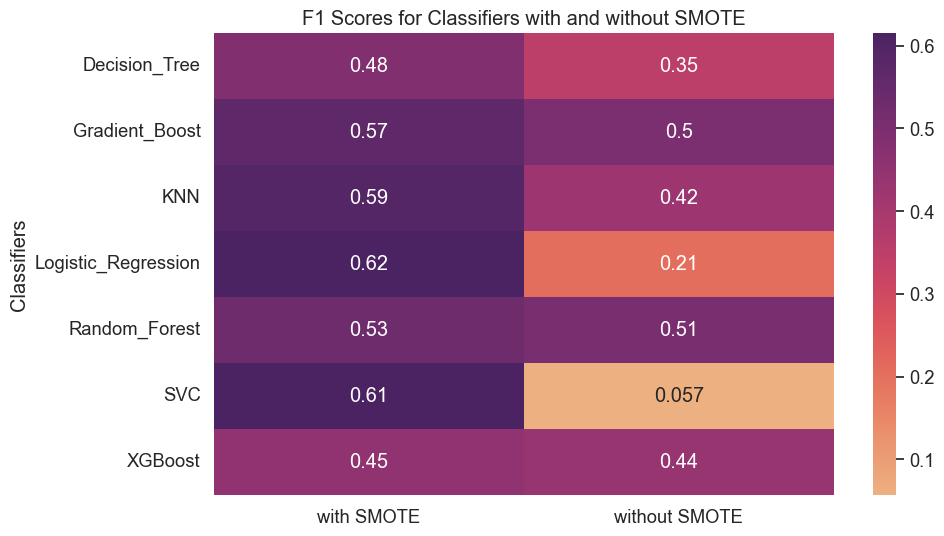

In [100]:
classifiers = {'Logistic_Regression': LogisticRegression(),
               'SVC': SVC(),
               'KNN': KNeighborsClassifier(),
               'Decision_Tree': DecisionTreeClassifier(),
               'Random_Forest': RandomForestClassifier(),
               'Gradient_Boost': GradientBoostingClassifier(),
               'XGBoost': XGBClassifier()}


# Define result dictionary to store precision scores
result_dict = {'Classifiers': [], 'with SMOTE': [], 'without SMOTE': []}

# Loop through classifiers and get F1 scores with and without SMOTE
for name, clf in classifiers.items():
    # without SMOTE
    clf.fit(X_train_transformed, y_train)
    y_pred = clf.predict(X_test_transformed)
    f1_nosmote = f1_score(y_test, y_pred)
    result_dict['Classifiers'].append(name)
    result_dict['without SMOTE'].append(f1_nosmote)
    
    # with SMOTE
    clf.fit(X_smote, y_smote)
    y_pred = clf.predict(X_test_transformed)
    f1_smote = f1_score(y_test, y_pred)
    result_dict['with SMOTE'].append(f1_smote)

# Create pivot table with mean precision scores for each classifier
result_df = pd.DataFrame(result_dict)
pivot_table = result_df.pivot_table(index='Classifiers', values=['with SMOTE', 'without SMOTE'], aggfunc='mean')

# Heatmap
sns.set(font_scale=1.2)
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='flare')
plt.title('F1 Scores for Classifiers with and without SMOTE');

## Cross Validation

In [101]:
models= {'Logistic_Regression': LogisticRegression(), 'SVC': SVC(), 'KNN': KNeighborsClassifier(), 
        'Decision_Tree': DecisionTreeClassifier(), 'Random_Forest': RandomForestClassifier(), 
        'Gradient_Boost': GradientBoostingClassifier(), 'XGBoost': XGBClassifier()}

f1_scores=[]
df_scores= {}

for name, model in zip(models.keys(), models.values()):
        kf= KFold(n_splits=5, shuffle=True, random_state=42)
        scorer=make_scorer(f1_score)
        cv_scores= cross_val_score(model, X_smote, y_smote, cv=kf, scoring=scorer)
        f1_scores.append(cv_scores)
        df_scores[name]= cv_scores

scoring_grid=pd.DataFrame.from_dict(df_scores)
scoring_grid.index=['CV1', 'CV2', 'CV3', 'CV4', 'CV5']
scoring_grid

,Logistic_Regression,SVC,KNN,Decision_Tree,Random_Forest,Gradient_Boost,XGBoost
CV1,0.666667,0.680412,0.666667,0.777778,0.752475,0.757282,0.769231
CV2,0.684685,0.686275,0.711538,0.645161,0.744186,0.733333,0.760870
CV3,0.724138,0.709091,0.752137,0.673267,0.759259,0.740741,0.770642
CV4,0.694737,0.651685,0.679245,0.658824,0.643678,0.688172,0.620690
CV5,0.687500,0.688172,0.700000,0.681818,0.731183,0.723404,0.719101


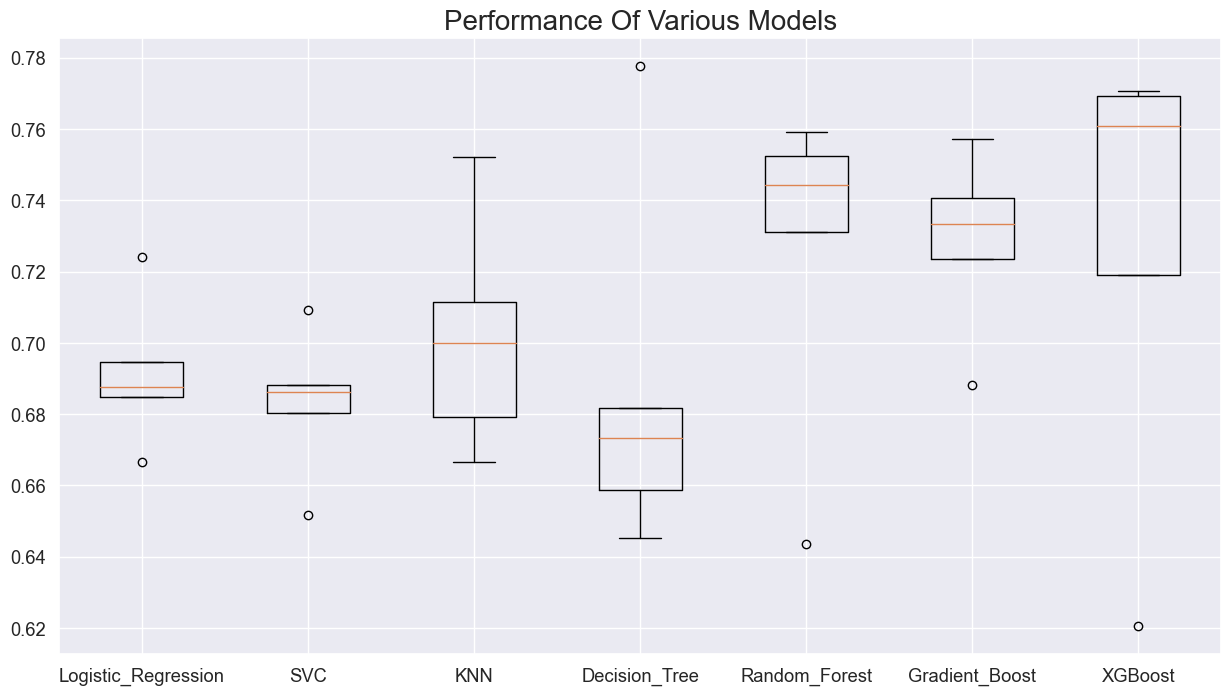

In [102]:
plt.figure(figsize=(15,8))
plt.boxplot(f1_scores, labels=models.keys())
plt.title('Performance of various models'.title(), fontsize=20);

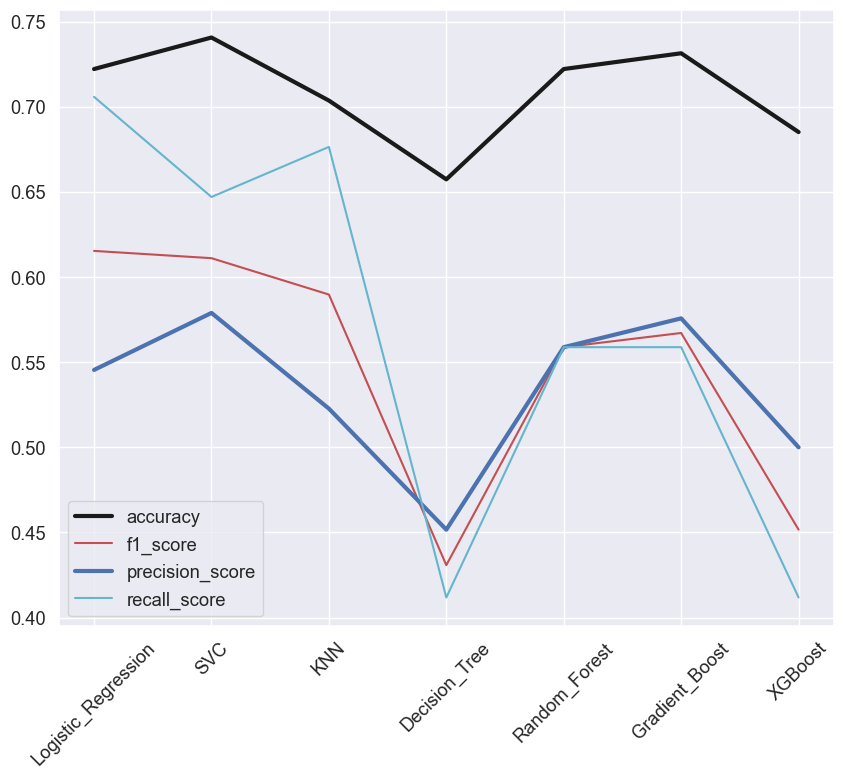

In [103]:
models= {'Logistic_Regression': LogisticRegression(), 'SVC': SVC(), 'KNN': KNeighborsClassifier(), 
        'Decision_Tree': DecisionTreeClassifier(), 'Random_Forest': RandomForestClassifier(), 
        'Gradient_Boost': GradientBoostingClassifier(), 'XGBoost': XGBClassifier()}

accuracy_scores={}
f1_scores={}
precision_scores= {}
recall_scores= {}

for name, model in zip(models.keys(), models.values()):
       model.fit(X_smote, y_smote)
       y_pred= model.predict(X_test_transformed)
       accuracy= accuracy_score(y_test, y_pred)
       f1=f1_score(y_test, y_pred)
       precision= precision_score(y_test, y_pred)
       recall=recall_score(y_test, y_pred)

       accuracy_scores[name]=accuracy
       f1_scores[name]=f1
       precision_scores[name]=precision
       recall_scores[name]=recall

plt.figure(figsize=(10,8))
plt.plot(f1_scores.keys(), accuracy_scores.values(), color='k', linewidth=3)
plt.plot(f1_scores.keys(), f1_scores.values(), color='r')
plt.plot(precision_scores.keys(), precision_scores.values(), color='b', linewidth=3)
plt.plot(recall_scores.keys(), recall_scores.values(), color='c')
plt.legend(['accuracy', 'f1_score', 'precision_score', 'recall_score'])
plt.xticks(rotation=45)
plt.show()

## SVC

### Finding Best Skewness Transformer technique

In [104]:
methods = [None, 'boxcox', 'sqrt', 'power', 'quantile']

method_f1_scores={}
method_accuracy_scores={}
for method in methods:
    preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('skewness_transformer', SkewnessTransformer(method=method, columns=['months_since_last_donation', 'number_of_donations', 'total_volume_donated_(c.c.)', 'months_since_first_donation'])),
            ('drop_attr', DropAttribute(attribute_names='total_volume_donated_(c.c.)')),
            ('scaler', StandardScaler()),
        ]), ['months_since_last_donation', 'number_of_donations', 'total_volume_donated_(c.c.)', 'months_since_first_donation'])
    ])

    # Transforming Train_set and Test_set
    X_train_transformed = preprocessor.fit_transform(X_train)
    X_test_transformed = preprocessor.transform(X_test)

    # SMOTE
    X_smote, y_smote= smote.fit_resample(X_train_transformed, y_train)

    # SVC model
    model = SVC()
    model.fit(X_smote, y_smote)
    y_pred = model.predict(X_test_transformed)
    accuracy= accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    method_f1_scores[method]=f1
    method_accuracy_scores[method]=accuracy



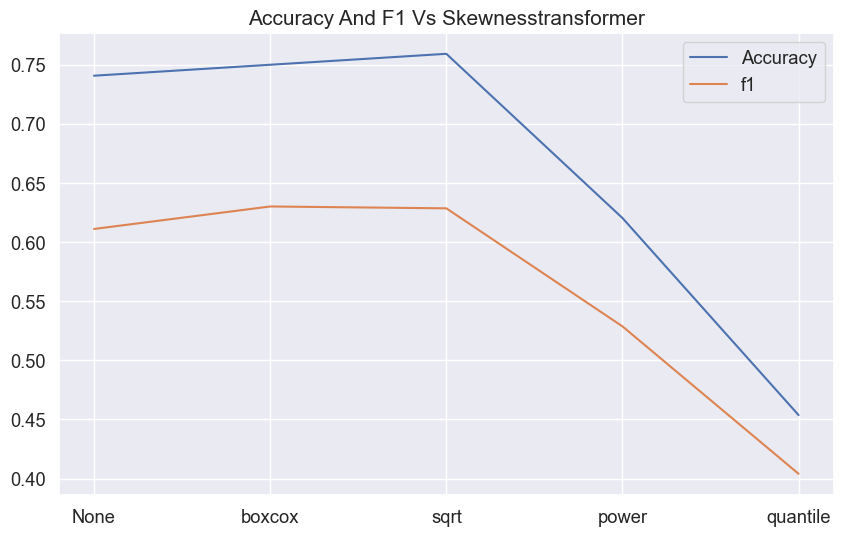

In [105]:
plt.figure(figsize=(10,6))

plt.plot(['None', 'boxcox', 'sqrt', 'power', 'quantile'], list(method_accuracy_scores.values()), label='Accuracy')
plt.plot(['None', 'boxcox', 'sqrt', 'power', 'quantile'], list(method_f1_scores.values()), label='f1')

plt.title('Accuracy and F1 vs SkewnessTransformer'.title(), fontsize=15)
plt.legend();


- <font color=darkviolet>From the results, we can observe that applying the Box Cox transformation to the skewed numerical features gave the best F1 score of 0.630 and accuracy score of 0.75 for the SVC model. The sqrt transformation also gave a good F1 score of 0.629 and accuracy score of 0.759, which is slightly better than the Box Cox transformation.</font>

- <font color=darkviolet>On the other hand, the power and quantile transformations gave poor F1 and accuracy scores. The quantile transformation, in particular, gave the worst F1 score of 0.404 and accuracy score of 0.454.</font>

Overall, applying a skewness transformation to the numerical features before training the SVC model improved the model's performance, particularly when using Box Cox or sqrt transformation. It is also worth noting that the accuracy score is generally higher than the F1 score, indicating that the model might be better at correctly predicting the majority class than the minority class. As F1 score is almost the same, We will apply 'sqrt' transformation to get slightly higher accuracy.

In [106]:
# setting skewness transformation method to 'sqrt' 

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('skewness_transformer', SkewnessTransformer(method='sqrt', columns=['months_since_last_donation', 'number_of_donations', 'total_volume_donated_(c.c.)', 'months_since_first_donation'])),
            ('drop_attr', DropAttribute(attribute_names='total_volume_donated_(c.c.)')),
            ('scaler', StandardScaler()),
        ]), ['months_since_last_donation', 'number_of_donations', 'total_volume_donated_(c.c.)', 'months_since_first_donation'])
    ])

    # Train_set
X_train_transformed = preprocessor.fit_transform(X_train)

# Test_set
X_test_transformed = preprocessor.transform(X_test)

# SMOTE
X_smote, y_smote= smote.fit_resample(X_train_transformed, y_train)


In [107]:
svc_before_tuning = SVC(probability=True)
svc_before_tuning.fit(X_smote, y_smote)
y_pred = svc_before_tuning.predict(X_test_transformed)

In [108]:
check_result(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.83      0.81      0.82        74
           1       0.61      0.65      0.63        34

    accuracy                           0.76       108
   macro avg       0.72      0.73      0.73       108
weighted avg       0.76      0.76      0.76       108

Accuracy 0.7592592592592593
precision 0.6111111111111112
F1 score 0.6285714285714287
ROC AUC score 0.7289348171701112
Confusion matrix
[[60 14]
 [12 22]]


ROC AUC Score is:  0.7281793244761717


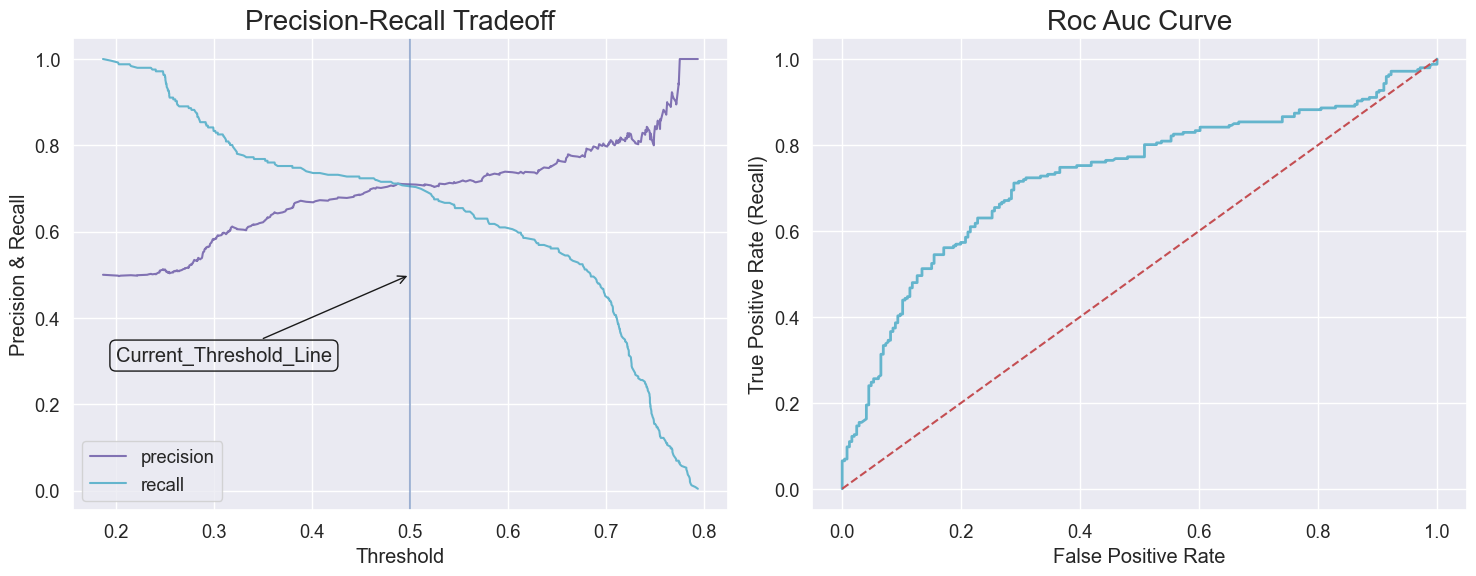

In [109]:
check_tradeoffs(svc_before_tuning, X_smote, y_smote, cv=5, threshold_proba=0.50)

#### Finding optimum threshold

In [110]:
svc_threshold= SVC(probability=True)

Max F1 score is:  0.6388888888888888
Optimum threshold is:  0.44


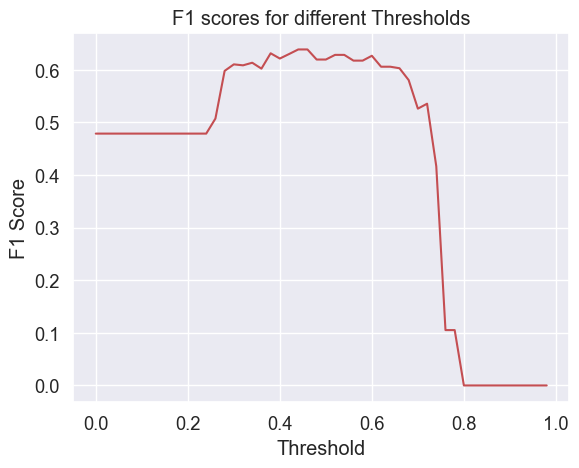

In [111]:
# finding optimum threshold value for SVC classifier
opt_threshold(svc_threshold, train_features=X_smote, train_labels=y_smote, test_features=X_test_transformed, test_labels=y_test)

In [112]:
# Training the model on the training data
svc_threshold.fit(X_smote, y_smote)

# Getting the predicted probabilities of each class
y_proba = svc_threshold.predict_proba(X_test_transformed)

# Setting the threshold for class 1 to 0.44
threshold = 0.44
y_pred_new_svc = (y_proba[:, 1] >= threshold).astype(int)

In [113]:
check_result(y_test, y_pred_new_svc)

              precision    recall  f1-score   support

           0       0.84      0.80      0.82        74
           1       0.61      0.68      0.64        34

    accuracy                           0.76       108
   macro avg       0.72      0.74      0.73       108
weighted avg       0.77      0.76      0.76       108

Accuracy 0.7592592592592593
precision 0.6052631578947368
F1 score 0.6388888888888888
ROC AUC score 0.7368839427662958
Confusion matrix
[[59 15]
 [11 23]]


<font color=darkviolet>Changing the threshold in this case seems to have improved the recall score for class 1, from 0.65 to 0.68, indicating that the model is now better able to correctly identify the positive cases.

### SVC Hyperparameter tuning

In [114]:
# Defining the parameter grid to search
param_grid = {'C': np.arange(0,5, 0.2), 
            'kernel': ['linear', 'rbf', 'sigmoid', 'poly'], 
            'gamma': ['scale', 'auto']
            }

# Definining the scoring metric to optimize for (precision score)
scoring = make_scorer(precision_score)

# Defining the SVC model
svc = SVC(probability=True)

# Performing GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(svc, param_grid=param_grid, scoring=scoring, cv=3, n_jobs=-1)
grid_search.fit(X_smote, y_smote)

# getting best model and its parameters
best_model_svc = grid_search.best_estimator_
best_params_svc = grid_search.best_params_

# evaluating best model on test set with optimum threshold
y_pred = (best_model_svc.predict_proba(X_test_transformed)[:, 1] > 0.44).astype(int)

print(classification_report(y_test, y_pred))
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))
print('f1',f1_score(y_test, y_pred))

# Print the best hyperparameters
print('Best hyperparameters:', best_params_svc)

              precision    recall  f1-score   support

           0       0.84      0.80      0.82        74
           1       0.61      0.68      0.64        34

    accuracy                           0.76       108
   macro avg       0.72      0.74      0.73       108
weighted avg       0.77      0.76      0.76       108

Confusion matrix:
[[59 15]
 [11 23]]
f1 0.6388888888888888
Best hyperparameters: {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}


<font color=darkviolet>It looks like the hyperparameter tuning did not improve the performance of the SVC model significantly. The precision, recall, and f1-score for class 1 remained the same after hyperparameter tuning. The accuracy, macro average of f1-score, and weighted average of f1-score also remained the same. However, it is worth noting that the model is performing reasonably well with an accuracy of 0.76, and a weighted average of f1-score of 0.76.

## LogisticRegression

In [115]:
methods = [None, 'boxcox', 'sqrt', 'power', 'quantile']

method_f1_scores={}
method_accuracy_scores={}
for method in methods:
    preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('skewness_transformer', SkewnessTransformer(method=method, columns=['months_since_last_donation', 'number_of_donations', 'total_volume_donated_(c.c.)', 'months_since_first_donation'])),
            ('drop_attr', DropAttribute(attribute_names='total_volume_donated_(c.c.)')),
            ('scaler', StandardScaler()),
        ]), ['months_since_last_donation', 'number_of_donations', 'total_volume_donated_(c.c.)', 'months_since_first_donation'])
    ])

    # Transforming Train_set and Test_set
    X_train_transformed = preprocessor.fit_transform(X_train)
    X_test_transformed = preprocessor.transform(X_test)

    # SMOTE
    X_smote, y_smote= smote.fit_resample(X_train_transformed, y_train)

    # LogisiticRegression model
    model = LogisticRegression()
    model.fit(X_smote, y_smote)
    y_pred = model.predict(X_test_transformed)
    accuracy= accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    method_f1_scores[method]=f1
    method_accuracy_scores[method]=accuracy

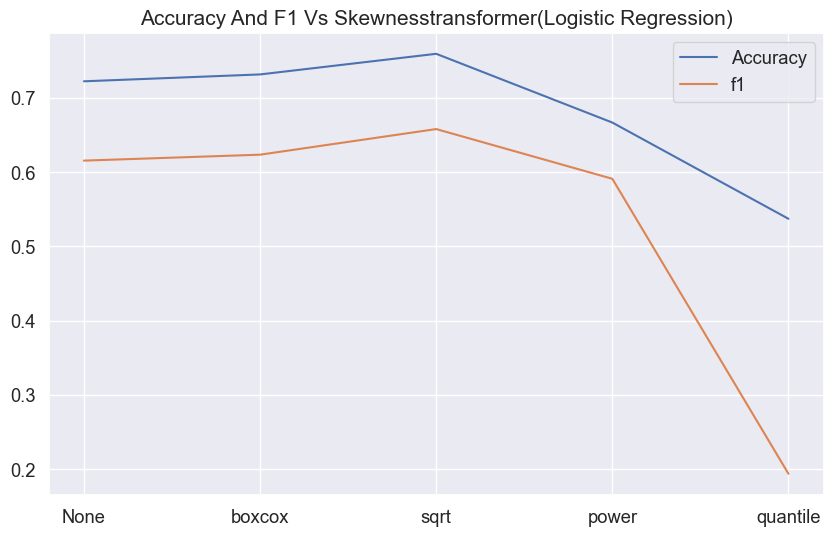

In [116]:
plt.figure(figsize=(10,6))

plt.plot(['None', 'boxcox', 'sqrt', 'power', 'quantile'], list(method_accuracy_scores.values()), label='Accuracy')
plt.plot(['None', 'boxcox', 'sqrt', 'power', 'quantile'], list(method_f1_scores.values()), label='f1')

plt.title('Accuracy and F1 vs SkewnessTransformer(Logistic Regression)'.title(), fontsize=15)
plt.legend();


In [117]:
# setting skewness transformation method to 'sqrt' 

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('skewness_transformer', SkewnessTransformer(method='sqrt', columns=['months_since_last_donation', 'number_of_donations', 'total_volume_donated_(c.c.)', 'months_since_first_donation'])),
            ('drop_attr', DropAttribute(attribute_names='total_volume_donated_(c.c.)')),
            ('scaler', StandardScaler()),
        ]), ['months_since_last_donation', 'number_of_donations', 'total_volume_donated_(c.c.)', 'months_since_first_donation'])
    ])

# Train_set
X_train_transformed = preprocessor.fit_transform(X_train)

# Test_set
X_test_transformed = preprocessor.transform(X_test)

# SMOTE
X_smote, y_smote= smote.fit_resample(X_train_transformed, y_train)


In [118]:
logreg_before_tuning = LogisticRegression()
logreg_before_tuning.fit(X_smote, y_smote)
y_pred_log = logreg_before_tuning.predict(X_test_transformed)

In [119]:
check_result(y_test, y_pred_log)

              precision    recall  f1-score   support

           0       0.86      0.77      0.81        74
           1       0.60      0.74      0.66        34

    accuracy                           0.76       108
   macro avg       0.73      0.75      0.74       108
weighted avg       0.78      0.76      0.77       108

Accuracy 0.7592592592592593
precision 0.5952380952380952
F1 score 0.6578947368421053
ROC AUC score 0.7527821939586645
Confusion matrix
[[57 17]
 [ 9 25]]


ROC AUC Score is:  0.7087960208870381


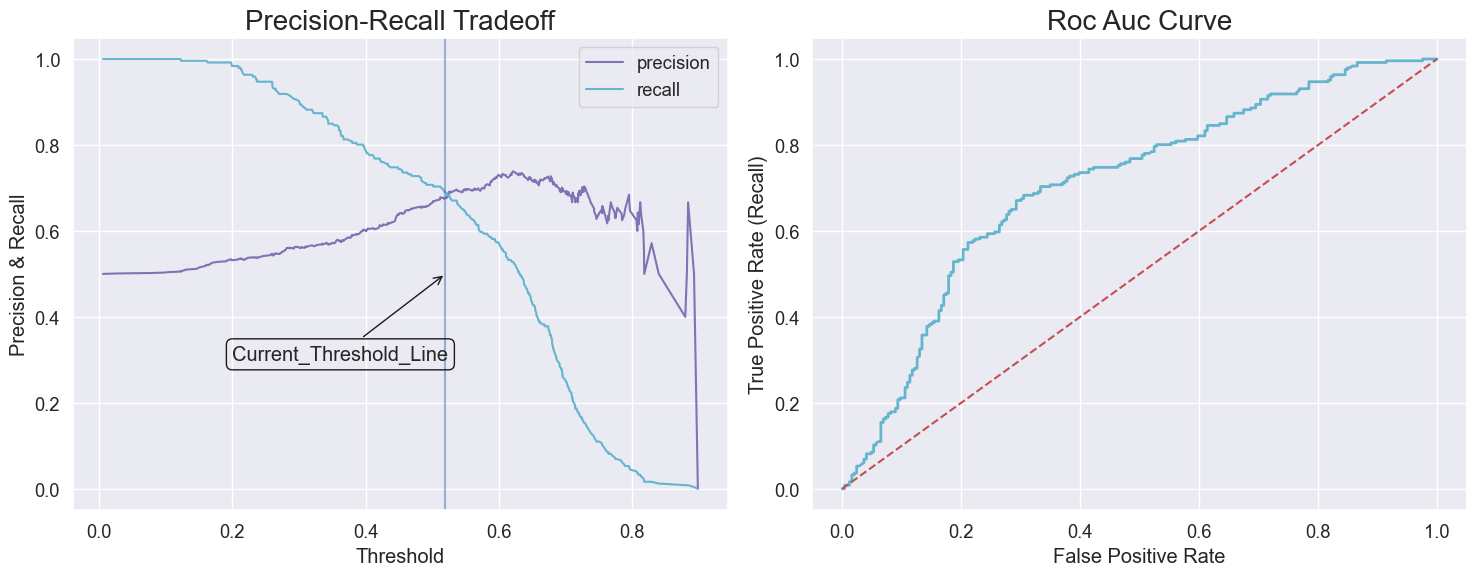

In [120]:
check_tradeoffs(logreg_before_tuning, X_smote, y_smote, cv=5, threshold_proba=0.52)

Max F1 score is:  0.6578947368421053
Optimum threshold is:  0.5


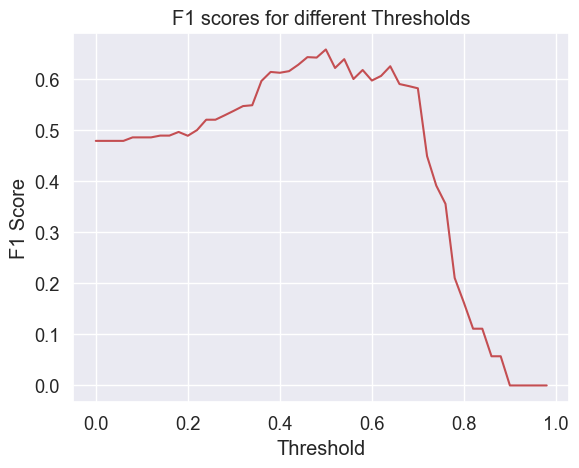

In [121]:
# finding optimum threshold value for LogisticRegression classifier
logreg_threshold = LogisticRegression()
opt_threshold(logreg_threshold, train_features=X_smote, train_labels=y_smote, test_features=X_test_transformed, test_labels=y_test)

<font color=darkviolet>The threshold value 0.5 is the default value so we do not need to change it again

### Logistic Regression Hyperparameter tuning

In [122]:
# Defining the logistic regression model
logreg = LogisticRegression()

# Defining the hyperparameters to tune
parameters = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# Defining the scoring metric to optimize for (precision score)
scorer = make_scorer(precision_score)

# Defining the grid search object
grid_search = GridSearchCV(estimator=logreg, param_grid=parameters, scoring=scorer, cv=3, n_jobs=-1, verbose=0)

# Fitting the grid search object to the training data
grid_search.fit(X_smote, y_smote)

# getting best model and its parameters
best_model_log = grid_search.best_estimator_
best_params_log = grid_search.best_params_

# evaluating best model on test set with optimum threshold
y_pred = (best_model_log.predict_proba(X_test_transformed)[:, 1] > 0.5).astype(int)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Printing the best hyperparameters
print('Best hyperparameters:', best_params_log)


              precision    recall  f1-score   support

           0       0.84      0.70      0.76        74
           1       0.52      0.71      0.60        34

    accuracy                           0.70       108
   macro avg       0.68      0.70      0.68       108
weighted avg       0.74      0.70      0.71       108

[[52 22]
 [10 24]]
Best hyperparameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}


<font color=darkviolet>It looks like the hyperparameter tuning has slightly decreased the overall performance of the LogisticRegression model. The accuracy has decreased from 0.76 to 0.70, and the f1-score has decreased from 0.66 to 0.60 for the positive class. The precision and recall scores for the positive class have also decreased from 0.60 and 0.74 to 0.52 and 0.71, respectively.

## Summarising performance

Here's a summary of the model development we carried out so far:

### For SVC model:

- We trained the SVC model with default hyperparameters and evaluated its performance using various metrics such as accuracy, precision, recall, f1-score, and ROC AUC score.
- We also visualized the confusion matrix to understand the misclassifications made by the model.
- We found that the default threshold of 0.5 gave suboptimal results and we tried to improve the model's performance by tuning the threshold value.
- We used the grid search technique to optimize the SVC model's hyperparameters, including C and gamma, and used the best set of hyperparameters to fit the model and get the predictions.
- We also evaluated the performance of the tuned model using the same set of metrics and compared it with the default model.
-Finally, we selected the tuned SVC model with a threshold of 0.44 as our final model, which gave the best results in terms of f1-score and ROC AUC score.


### For Logistic Regression model:

- We then trained the Logistic Regression model with default hyperparameters and evaluated its performance using various metrics such as accuracy, precision, recall, f1-score, and ROC AUC score.
- Again we tried to improve the model's performance by tuning the threshold value.
- We used the grid search technique to optimize the Logistic Regression model's hyperparameters, including C, penalty, and solver, and used the best set of hyperparameters to fit the model and get the predictions.
- We also performed hyperparmeter tuning and then analysed results 
- However, we found that the tuned Logistic Regression model with a threshold of 0.5 gave unfavourable results compared to the default model in terms of f1-score and ROC AUC score. Therefore, we did not select this model as our final model.

Overall, we can say that the tuned SVC model with a threshold of 0.44 gave the best performance among all the models we developed.

##### <p style='font-size:1.3em; color:tomato'>Hence, we will select Support Vector Classifier model with threshold at 0.44<p> 

It gives following results:

Accuracy 0.76

precision 0.60

F1 score 0.64

ROC AUC score 0.74



## Crossing checking model on test subsets

In [123]:
data_subset= X_test_transformed[10:60]
label_subset= y_test[10:60]

In [124]:
result= (svc_threshold.predict_proba(data_subset)[:, 1] > 0.44).astype(int)

In [125]:
check_result(label_subset, result)

              precision    recall  f1-score   support

           0       0.90      0.82      0.86        34
           1       0.68      0.81      0.74        16

    accuracy                           0.82        50
   macro avg       0.79      0.82      0.80        50
weighted avg       0.83      0.82      0.82        50

Accuracy 0.82
precision 0.6842105263157895
F1 score 0.742857142857143
ROC AUC score 0.8180147058823529
Confusion matrix
[[28  6]
 [ 3 13]]


ROC AUC Score is:  0.7224264705882353


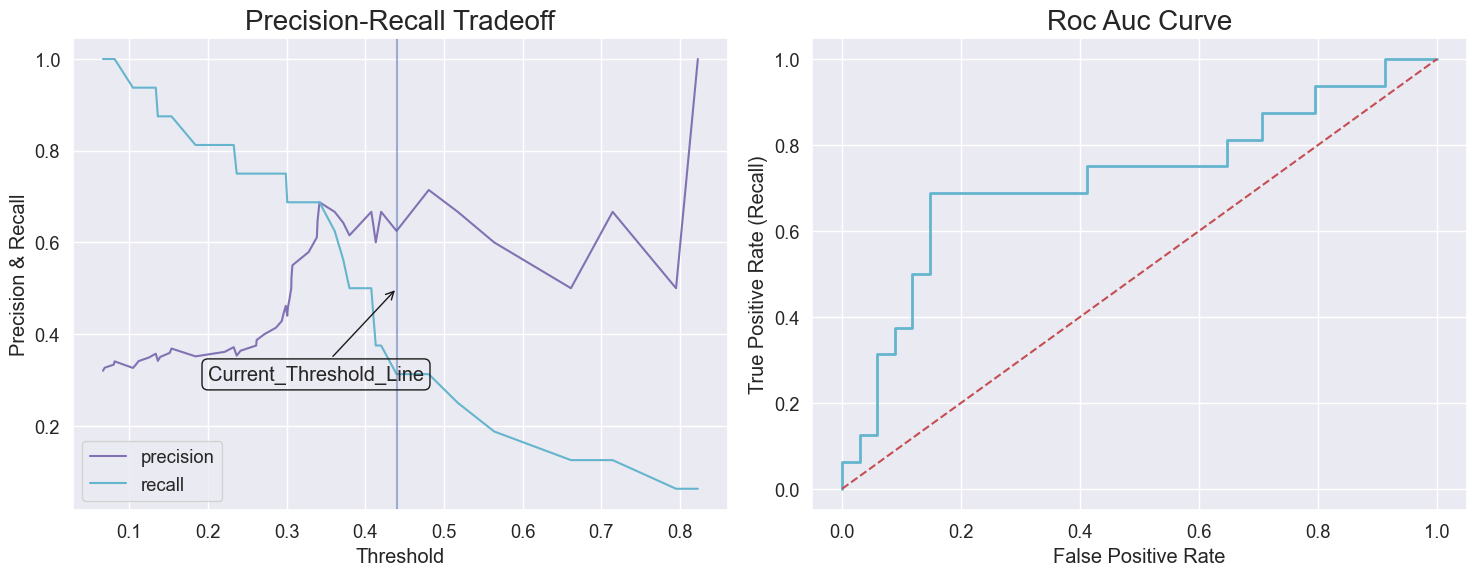

In [126]:
check_tradeoffs(svc_threshold, X=data_subset, y=label_subset, cv=5, threshold_proba=0.44)

### Plotting Decision Boundary on test subset

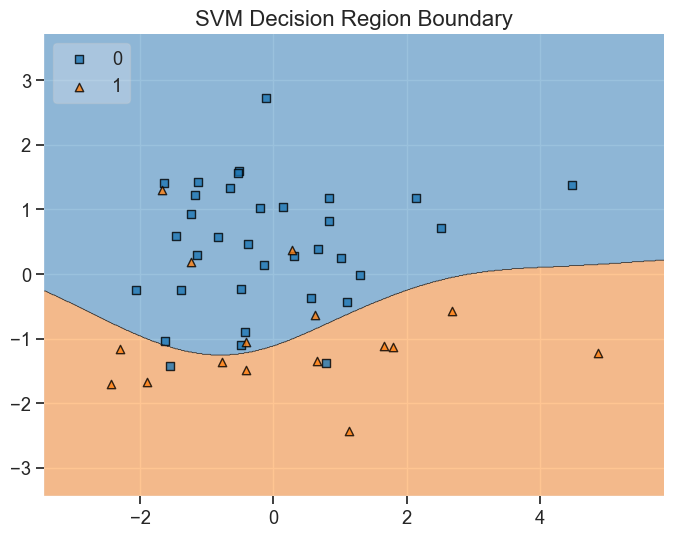

In [127]:
svc_cloned= clone(svc_threshold)

pca = PCA(n_components = 2)
data_subset2 = pca.fit_transform(data_subset)
svc_cloned.fit(data_subset2, label_subset)

plt.figure(figsize=(8,6))
plot_decision_regions(data_subset2, np.array(label_subset), clf=svc_cloned, legend=2)

plt.title('SVM Decision Region Boundary', size=16);

<font color=darkviolet>We can clearly see that the model is working well with the given subset of test data. The decision boundary appear to be smooth separating both the classes. However, the model is making few mistakes as few orange shapes lie in blue region and couple of blue squares are in orange region.

# Deployment

In [128]:
# dumping model
pickle.dump(svc_threshold, open("svc_model.pkl", "wb"))

Before we dump "scaler", we have to fit it on the train set. Since we have used Column Transformer so far, it was not explicitly performed before.

In [129]:
X_train_new= X_train.drop('total_volume_donated_(c.c.)', axis=1)

In [130]:
skewness_transformer= SkewnessTransformer(method='sqrt')
X_train_new=skewness_transformer.transform(X_train_new)

In [131]:
X_train_new_scaled=scaler.fit_transform(X_train_new)

## Deployed model

In [132]:
# sample data points to test
donation.sample(5)

,months_since_last_donation,number_of_donations,total_volume_donated_(c.c.),months_since_first_donation,made_donation_in_march_2007
174,4,1,250,4,0
63,2,2,500,4,1
137,2,1,250,2,0
457,3,1,250,3,1
118,2,2,500,11,0


In [133]:
#user input

#query = [months_since_last_donation, months_since_first_donation, number_of_donations]
query= np.array([11,72,8])

# Preprocessing
query_list= list(query)
query_sqrt= np.array([np.sqrt(x) for x in query_list]).reshape(1,-1)
query_scaled=scaler.transform(query_sqrt)

#prediction
prob=(svc_threshold.predict_proba(query_scaled)[:, 1])
answer= (prob > 0.44).astype(int)

if answer ==1:
    print("Donor is likely to donate in March 2007")

else:
    print("Donor is unlikely to donate in March 2007")

Donor is unlikely to donate in March 2007
